In [39]:
#Load the libraries
#Libraries for data manipulation

import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv('data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [ ]:
#Data Prepocessing or Data Cleaning
# Bad data: contains empty cells, wrong format(described using wrongly written dates)
# Wrong data(like writing negative age), duplicates(rows with similar data)

#Data cleaning principles


In [38]:
#Empty values or empty cells
#Check for empty values

print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [37]:
#Checking Wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [36]:
#Checking for non-numeric values in columns using a for loop

for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

In [35]:
#wrong data
#checking for negative values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in column: {col}")

In [34]:
#Dealing with duplicates
#First check for duplicates
duplicate = df.duplicated()
if duplicate.any():
    print("Duplicate rows detected")
else:
    print("No duplicates found")

Duplicate rows detected


In [33]:
#Fill empty values with mean for numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/wm/8zk7prqs5ld2f1mxhnc4klbh0000gn/T/ipykernel_27403/1153818332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [32]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [31]:
#EDA Exploratory Data Analysis
#Check the shape of the dataset

print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (169, 4)


In [30]:
#Summary of statistics
print("Summary Statistics: ")
df.describe()

Summary Statistics: 


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [29]:
#Data Visualization: Quickest way to make sense4 out of the given data by plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Calories Distribution')

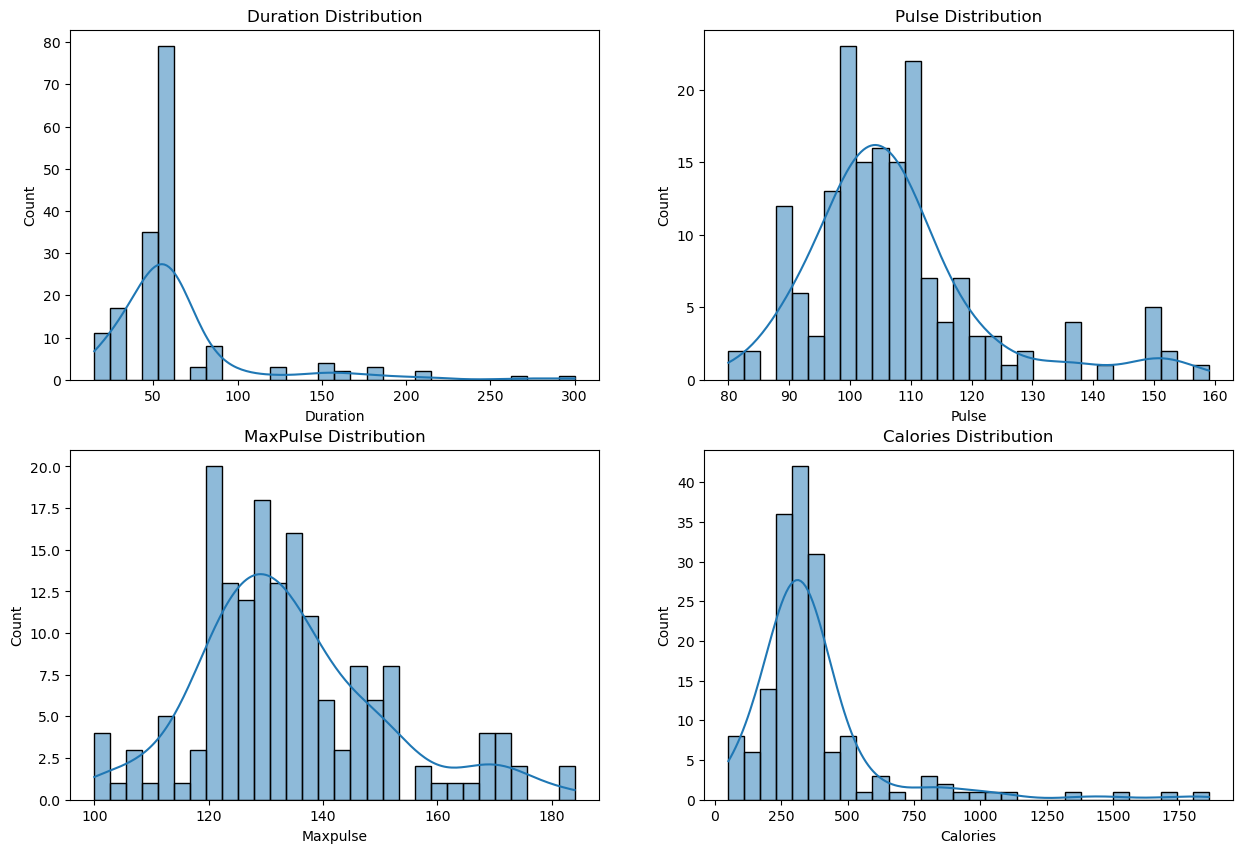

In [25]:
#Set figure size first
plt.figure(figsize=(15, 10))
#Histogram of Duration
plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')

#Histogram for Pulse
plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.title('Pulse Distribution')

#Histogram for Maxpulse
plt.subplot(2, 2, 3)
sns.histplot(df['Maxpulse'], bins=30, kde=True)
plt.title('MaxPulse Distribution')

#Histogram for Calories
plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')


Text(0.5, 1.0, 'Maxpulse vs Calories')

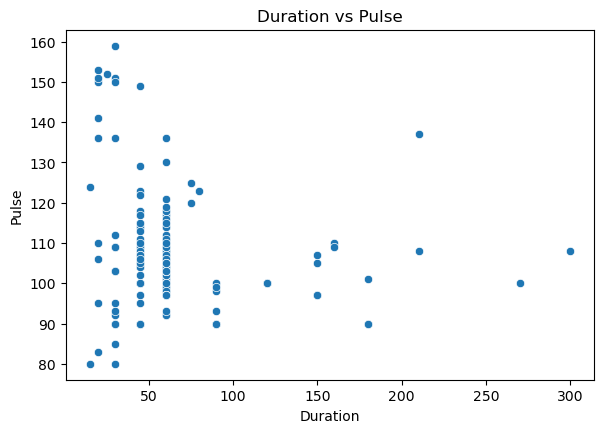

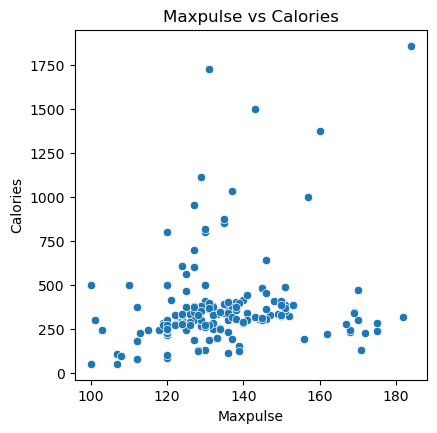

In [28]:
#Scatter plot of Duration vs Pulse
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x="Duration", y="Pulse", data=df)
plt.title('Duration vs Pulse')

#Scatter plot of Maxpulse vs Calories
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
sns.scatterplot(x="Maxpulse", y="Calories", data=df)
plt.title('Maxpulse vs Calories')


Text(0.5, 1.0, 'Correlation Heatmap')

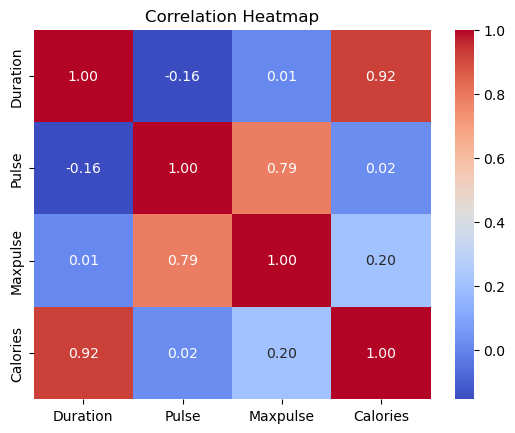

In [21]:
#Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
